Import stuff and initialize global parameters.

In [153]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Conv2D, Flatten, Dense, LSTM, \
    MaxPooling2D
from keras.models import Sequential
from common import extract_training_data_as_stacked
from sklearn.metrics import explained_variance_score

IMAGE_SIZE = (64, 64, 3)

# Convolutional network
Reading data as bundles and creating initial model.

In [165]:
images, labels = extract_training_data_as_stacked("Data/20171029-201949.h264.avi", 
                                                  "Data/20171029-201949.h264.csv", 
                                                  IMAGE_SIZE)

(1741, 64, 64, 12)

In [155]:
y_train = labels.as_matrix(columns=labels.columns[1: -1])
y_train.shape

(1741, 3)

In [156]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu', input_shape=(64, 64, 12)))
model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu'))
model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu'))

model.add(Flatten())
model.add(Dense(3, activation='linear'))

model.compile(loss="mse", optimizer="adam")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_202 (Conv2D)          (None, 62, 62, 32)        3488      
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 11, 11, 32)        9248      
__________

In [157]:
history = model.fit(images, y_train, batch_size=64, epochs=10, validation_split=0.04)

Train on 1671 samples, validate on 70 samples
Epoch 1/10
1671/1671 [==============================] - 32s - loss: 0.1291 - val_loss: 0.2506
Epoch 2/10
1671/1671 [==============================] - 33s - loss: 0.0685 - val_loss: 0.3167
Epoch 3/10
1671/1671 [==============================] - 32s - loss: 0.0531 - val_loss: 0.2543
Epoch 4/10
1671/1671 [==============================] - 29s - loss: 0.0478 - val_loss: 0.3173
Epoch 5/10
1671/1671 [==============================] - 29s - loss: 0.0476 - val_loss: 0.2867
Epoch 6/10
1671/1671 [==============================] - 30s - loss: 0.0423 - val_loss: 0.3283
Epoch 7/10
1671/1671 [==============================] - 29s - loss: 0.0387 - val_loss: 0.3232
Epoch 8/10
1671/1671 [==============================] - 29s - loss: 0.0366 - val_loss: 0.2733
Epoch 9/10
1671/1671 [==============================] - 29s - loss: 0.0334 - val_loss: 0.2687
Epoch 10/10
1671/1671 [==============================] - 29s - loss: 0.0328 - val_loss: 0.2635


In [158]:
test_images, test_labels = extract_training_data_as_stacked("Data/20171029-201639.h264.avi", 
                                                            "Data/20171029-201639.h264.csv", 
                                                            IMAGE_SIZE)

prediction = model.predict(test_images)

### Convolutional network results
Testing prediction printout and graphs.

In [159]:
prediction

array([[ 0.1758866 ,  0.16755994,  0.8397119 ],
       [ 0.16517305,  0.17517249,  0.83600944],
       [ 0.16393977,  0.17928033,  0.82845694],
       ..., 
       [ 0.70465142,  0.10776694,  0.881271  ],
       [ 0.18975458,  0.0507403 ,  0.88872868],
       [-0.13496089,  0.16233106,  0.82866615]], dtype=float32)

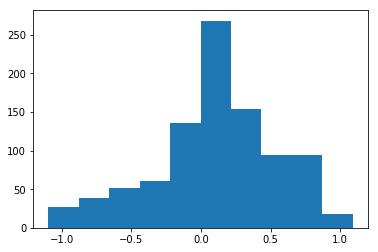

In [160]:
plt.hist(prediction[:, 0])
plt.show()

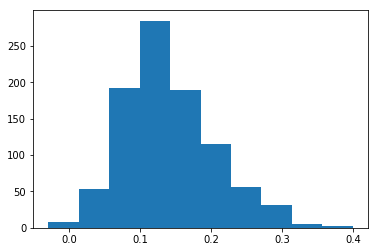

In [161]:
plt.hist(prediction[:, 1])
plt.show()

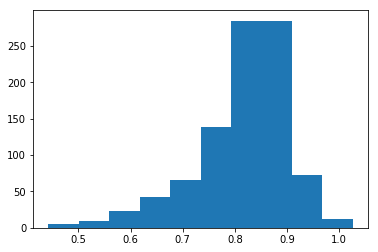

In [162]:
plt.hist(prediction[:, 2])
plt.show()

### Result analysis
Explained variance etc.

Firstly clip incorrect values back into known bounds. Afterwards find the explained variance.

In [163]:
validation_labels = test_labels.as_matrix(columns=test_labels.columns[1: -1])
clipped_prediction = np.zeros_like(prediction)

clipped_prediction[:, 0] = np.clip(prediction[:, 0], -1, 1)
clipped_prediction[:, 1] = np.clip(prediction[:, 1], 0, 1)
clipped_prediction[:, 2] = np.clip(prediction[:, 2], 0, 1)

print(validation_labels.shape)
print(clipped_prediction.shape)

(939, 3)
(939, 3)


In [164]:
explained_variance_score(validation_labels, clipped_prediction)

0.059313344466041341